<a href="https://colab.research.google.com/github/JMML2021/-Sprint-9.-An-lisi-de-sentiment-i-textos/blob/main/Sprint_9_Text_mining_An%C3%A0lisi_de_sentiment_i_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Una gran part de les dades que podem trobar per analitzar utilitzant l'aprenentatge automàtic és text lliure. En aquest sprint veurem com analitzar-lo, netejar-lo i realitzar anàlisi de sentiments.

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# - Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [2]:
#Loading NLTK
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

El texto sale de aquí:

https://www.nltk.org/



---

Imagen:

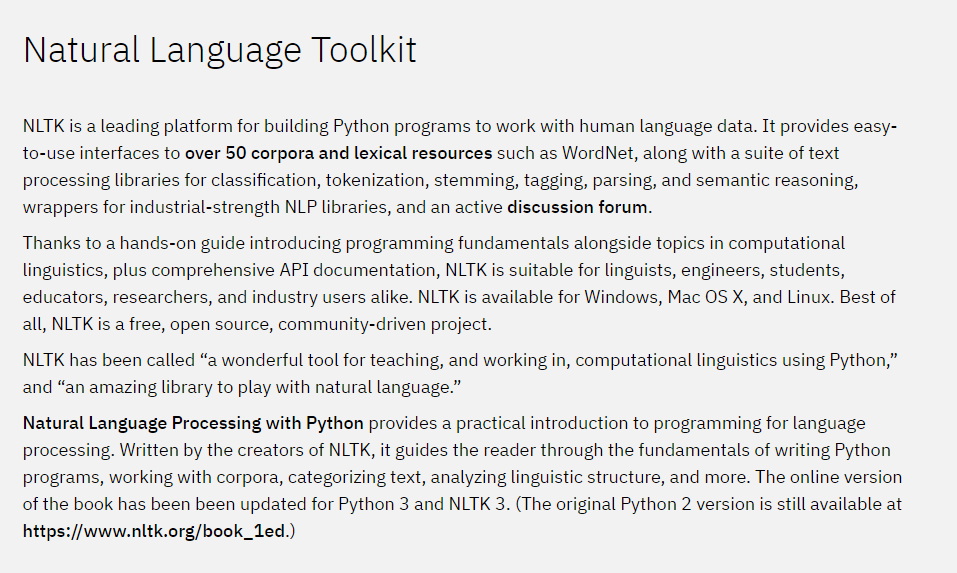

In [4]:
from nltk.tokenize import sent_tokenize

text="""Natural Language Toolkit
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

Natural Language Processing with Python provides a practical introduction to programming for language processing. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more. The online version of the book has been been updated for Python 3 and NLTK 3. (The original Python 2 version is still available at https://www.nltk.org/book_1ed.)"""

tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Natural Language Toolkit\nNLTK is a leading platform for building Python programs to work with human language data.', 'It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.', 'Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike.', 'NLTK is available for Windows, Mac OS X, and Linux.', 'Best of all, NLTK is a free, open source, community-driven project.', 'NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”\n\nNatural Language Pr

In [5]:
#Identifico los tokems:

from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)
print(tokenized_word)

['Natural', 'Language', 'Toolkit', 'NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'and', 'semantic', 'reasoning', ',', 'wrappers', 'for', 'industrial-strength', 'NLP', 'libraries', ',', 'and', 'an', 'active', 'discussion', 'forum', '.', 'Thanks', 'to', 'a', 'hands-on', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'in', 'computational', 'linguistics', ',', 'plus', 'comprehensive', 'API', 'documentation', ',', 'NLTK', 'is', 'suitable', 'for', 'linguists', ',', 'engineers', ',', 'students', ',', 'educators', ',', 'researchers', ',', 'and', 'industry', 'users', 

In [6]:
# Analizo la frecuencia con la que salen los tokens

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 137 samples and 247 outcomes>


In [7]:
fdist.most_common(5)

[(',', 28), ('.', 9), ('and', 9), ('for', 8), ('NLTK', 7)]

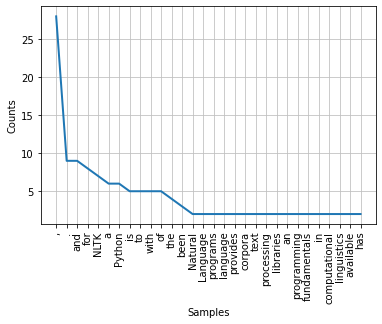

In [8]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Vemos que las palabras que más salen no son las palabras más i mportantes porque la 'coma' o la conjunción 'and' no nos aportarán mucha información



---



# - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
# buscamos las stopwords:

from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words=set(stopwords.words("english"))
print(stop_words)
print('Total cantidad de stopwords indentificadas: ', len(stop_words))

{'them', "couldn't", 'itself', 'for', 'about', 'mightn', 'nor', "you've", 'are', 'd', 's', 'hasn', 'before', 'once', 'who', 'it', 'will', 'over', 'now', "wasn't", "haven't", 'same', 'doesn', 'been', 'couldn', 'we', "mightn't", 'my', 'her', 'just', 're', 'below', "you'd", 'which', 'the', 'wouldn', 'haven', 'i', 'its', 'this', 'they', 'such', 'until', "should've", 'himself', "she's", 'here', 'off', 'weren', 'more', 'those', 'into', 'if', 'yours', 'me', 'these', 'herself', 'than', 'and', 'up', "it's", 'won', 'again', 'she', 'by', 'had', "isn't", 'each', 'most', 'being', 'own', "shouldn't", 'both', 'hadn', 'through', 'when', 'ourselves', 'ma', "don't", 'few', 'themselves', 'a', 'were', 'have', 'myself', 'that', "mustn't", 'y', 'against', 'does', 'he', "needn't", 't', 'hers', 'ain', 'above', 'other', 'be', 'while', 'not', 'where', 'under', 'needn', 'didn', 'down', 'wasn', 'doing', 'has', 'you', 'as', 'at', 'our', 'or', 'some', 'no', 'm', 'mustn', 'in', "you'll", 'why', 'only', 'how', 'havin

tokenized_text=sent_tokenize(text)

In [39]:
tokenized_sent = tokenized_word

filtered_sent=[]
for w in tokenized_sent:
    #print(w)
    if w not in stop_words:
        filtered_sent.append(w)
print("frases Tokenized:",tokenized_sent)
print("Tolkens filtrados: ",filtered_sent)

frases Tokenized: ['Natural', 'Language', 'Toolkit', 'NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'and', 'semantic', 'reasoning', ',', 'wrappers', 'for', 'industrial-strength', 'NLP', 'libraries', ',', 'and', 'an', 'active', 'discussion', 'forum', '.', 'Thanks', 'to', 'a', 'hands-on', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'in', 'computational', 'linguistics', ',', 'plus', 'comprehensive', 'API', 'documentation', ',', 'NLTK', 'is', 'suitable', 'for', 'linguists', ',', 'engineers', ',', 'students', ',', 'educators', ',', 'researchers', ',', 'and', 'in

In [12]:
# Stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Natural', 'Language', 'Toolkit', 'NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', '50', 'corpora', 'lexical', 'resources', 'WordNet', ',', 'along', 'suite', 'text', 'processing', 'libraries', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'semantic', 'reasoning', ',', 'wrappers', 'industrial-strength', 'NLP', 'libraries', ',', 'active', 'discussion', 'forum', '.', 'Thanks', 'hands-on', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'computational', 'linguistics', ',', 'plus', 'comprehensive', 'API', 'documentation', ',', 'NLTK', 'suitable', 'linguists', ',', 'engineers', ',', 'students', ',', 'educators', ',', 'researchers', ',', 'industry', 'users', 'alike', '.', 'NLTK', 'available', 'Windows', ',', 'Mac', 'OS', 'X', ',', 'Linux', '.', 'Best', ',', 'NLTK', 'free', ',', 'open', 'source'

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [42]:
#Lexicon Normalization

#Nos vamos a  aquedar con la parte de la palabra que realmente aporta información

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()


print('\n Ejemplo de lematización:\n')
word = "fly"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:   ",stem.stem(word))


 Ejemplo de lematización:

Lemmatized Word: fly
Stemmed Word:    fli


# - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.


---



Tomaremos esta frase ***Albert Einstein was born in Ulm, Germany in 1879.*** e identicaremos los elementos importantes de la frase.

In [44]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens=nltk.word_tokenize(sent)
print('\n Los tokens son: \n')
print(tokens)


 Los tokens son: 

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
# Cada elemento de la palabra identifico que función hace dentro de la oración:

nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]



El proceso que seguiremos es el siguiente:

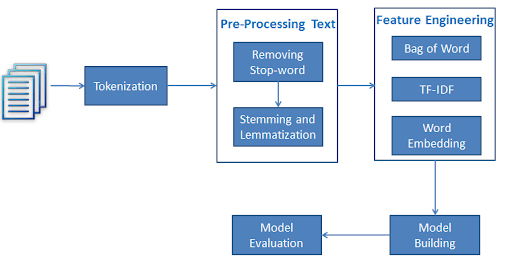



---



Ahora que con una frase vemos como funciona vamos a trabajar con toda la bases de datos:




---



In [19]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Import pandas
import pandas as pd


data=pd.read_csv('/content/drive/MyDrive/01_COLAB/train.tsv', sep='\t')

In [21]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [22]:
# Cojo una sola línea:

data.iloc[0][2]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [23]:
# Identifico que estructura tiene el archivo:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [24]:
# En este fichero la parte importante es la columna sentimiento.
# Voy a ver que cantidad de puntuacion hay para cada valor.

data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

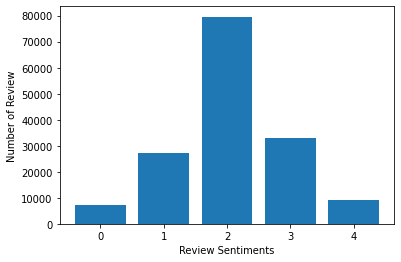

In [25]:
# Mirar las cantidades aorta poco
# Mejor graficarlo

Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

Vemos que la mayor valoración es 2 que es una puntuación media y los extremos la cantidad de veces que lo han valorado es poco. 

Esto nos podría hacer obligar a forzar a trabajar con los datos de los extremos y una solución es eliminar las frases que su puntuación sea 2




In [26]:
# Ahora vamos a vectorizar las palabras

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [27]:
print(text_counts)

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


In [28]:
# Creamos un modelo y para ello vamos a separar las frases de test y de Train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [45]:
from sklearn.naive_bayes import MultinomialNB
#Importamos el módulo scikit-learn para el cálculo de la precisión

from sklearn import metrics
# Generamos el modeloo utilizando el Naive Bayes multinomial

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)


print("MultinomialNB Accuracy: ",round(metrics.accuracy_score(y_test, predicted),2))

MultinomialNB Accuracy:  0.59


Nos ha dado un valor de de Accuracy de 0.59 que yo lo consideraría un poco bajo

In [30]:
# Aplicamos el modelo Naive Bayes multinomial

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Generamos el modeloo utilizando el Naive Bayes multinomial

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


In [33]:
import nltk
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""

tokens = nltk.word_tokenize(sentence)
tokens
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [34]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
#entities

In [36]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

Tomo como documentación el siguiente video
https://www.youtube.com/watch?v=DxnXVbHGeBg

In [37]:
from nltk.corpus import treebank
t = treebank.parsed_sents('the father')[0]
t.draw()

OSError: ignored

# - Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

Utilizaré el modulo **SentimentIntensityAnalyzer** , que es un modelo ya entrenado, que me dará un score con el porcentaje de palabras positivas, negativas y neutras.

Lo aplicaré al texto que he excogido anteriormente en el ejercicio 1 y veré que resultado me da.

SentimentIntensityAnalyzer() de VADER, toma una cadena y devuelve un diccionario de puntajes en cada una de las cuatro categorías:

* negativo

* neutral

* positivo

* compuesto (calculado mediante la normalización de las puntuaciones anteriores)





In [53]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
 
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(text)

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [56]:
analizador = SentimentIntensityAnalyzer()

In [58]:
# Listado de las frases
sentences

['Natural Language Toolkit\nNLTK is a leading platform for building Python programs to work with human language data.',
 'It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.',
 'Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike.',
 'NLTK is available for Windows, Mac OS X, and Linux.',
 'Best of all, NLTK is a free, open source, community-driven project.',
 'NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”\n\nNatural Langua

In [79]:
import statistics

valores=[]

neg=[]
neu=[]
pos=[]
compound=[]


for i, sentence in enumerate(sentences):
    #print(i, sentence)
    scores = analizador.polarity_scores(sentence)
    #print('i= ', i, scores, type(scores))
    neu.append(scores['neu'])
    neg.append(scores['neg'])
    compound.append(scores['compound'])
    pos.append(scores['pos'])
    valores.append(scores)

    #for key in scores:
        #print(key, ': ', scores[key])
        #print()
        
print('\n Valores: ')
valores[2]['neu']

print('neutros:', neu,'    -> ', round(statistics.mean(neu),2))
print('pos:    ', pos,'    -> ', round(statistics.mean(pos),2))
print('neg:    ', neg,'    -> ', round(statistics.mean(neg),2))
print('Compound:','    -> ', compound, round(statistics.mean(compound),2))


 Valores: 
neutros: [0.865, 0.935, 0.846, 1.0, 0.516, 0.689, 1.0, 1.0, 0.777]     ->  0.85
pos:     [0.135, 0.065, 0.154, 0.0, 0.484, 0.311, 0.0, 0.0, 0.223]     ->  0.15
neg:     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     ->  0.0
Compound:     ->  [0.3612, 0.4019, 0.5994, 0.0, 0.8176, 0.9313, 0.0, 0.0, 0.3182] 0.38


In [67]:
valores
valores1=pd.DataFrame(valores)
valores2 = valores1.mean()

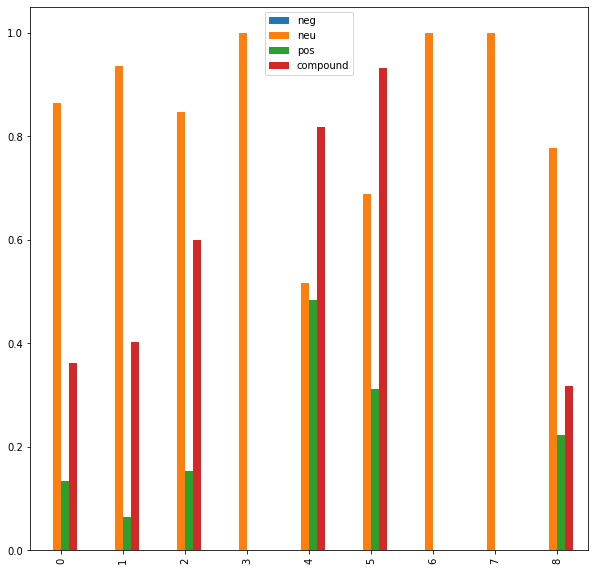

In [73]:
valores1.plot(kind = 'bar',figsize=(10,10))

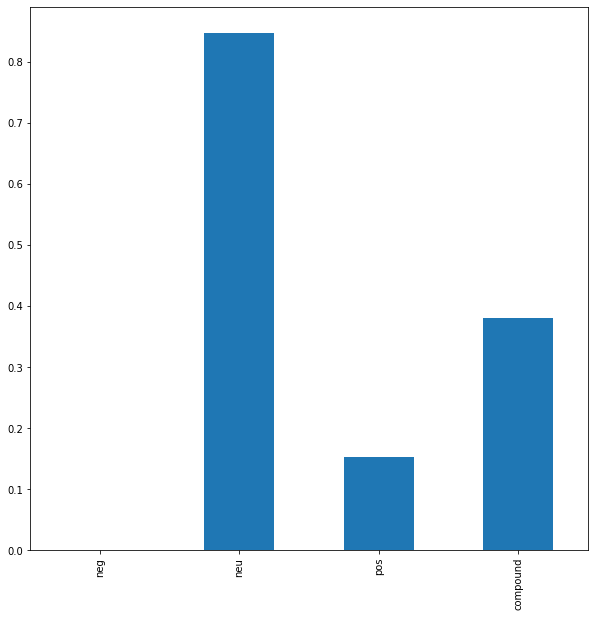

In [76]:
valores2.plot(kind = 'bar',figsize=(10,10))

Vemos claramente que el texto lo podemos considerar como neutro, nada negativo y la vertiente positiva nos ayudan a decir que el texto es en terminos generales es positivo

¿Qué es compuesto en Vader?
La puntuación compuesta es la suma de puntuaciones positivas, negativas y neutras que luego se normaliza entre -1 (negativo más extremo) y +1 (positivo más extremo). 

Cuanto más se acerque la puntuación de Compound a +1, mayor será la positividad del texto. 

En este caso 0.4 por lo que lo considerararemso como positivo 

**Conclusion**

Vemos que utilizar NLTK no es complicado porque el kit de herramientas de lenguaje natural, es un conjunto de módulos de programas de código abierto que proporciona recursos de lingüística computacional para usar en la interpretción de textos. 

NLTK cubre el procesamiento de lenguaje natural simbólico y estadístico. Realmente ha sido muy útil este modulo.